***** Welcome to Personal Finance Tracker *****
1. Add Income
2. Add Expense
3. Calculate Savings
4. Generate Expense Report by Category
5. Generate Expense Chart
6. Done!
Enter your choice (1-6): 1
Enter Income amount: 50000
Income of $50000.0 added successfully
***** Welcome to Personal Finance Tracker *****
1. Add Income
2. Add Expense
3. Calculate Savings
4. Generate Expense Report by Category
5. Generate Expense Chart
6. Done!
Enter your choice (1-6): 2
Entern expense discription: Rent
Enter expense amount: 3500
Enter expense category: Rent
Expense added successfully
***** Welcome to Personal Finance Tracker *****
1. Add Income
2. Add Expense
3. Calculate Savings
4. Generate Expense Report by Category
5. Generate Expense Chart
6. Done!
Enter your choice (1-6): 2
Entern expense discription: Had dinner 
Enter expense amount: 32
Enter expense category: Food
Expense added successfully
***** Welcome to Personal Finance Tracker *****
1. Add Income
2. Add Expense
3. Calculate Savings
4. 

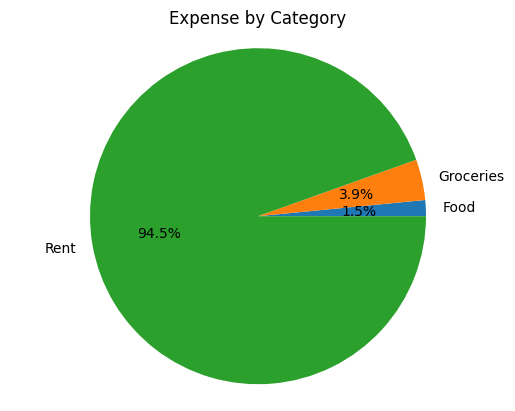

***** Welcome to Personal Finance Tracker *****
1. Add Income
2. Add Expense
3. Calculate Savings
4. Generate Expense Report by Category
5. Generate Expense Chart
6. Done!
Enter your choice (1-6): 6
Thank you for using tracker!


In [2]:
#Importing required libraries
import json
import matplotlib.pyplot as plt

#Initializing variables
income= 0.0
expense= []
savings= 0.0


#Defining required functions.
def load_data():
  global income, expense, savings
  try:
    with open('transactions.json', 'r') as file:
      data= json.load(file)
      income= data.get('income', 0.0)
      expense= data.get('expense', [])
      savings= data.get('savings', 0.0)
  except FileNotFoundError:
      pass

def save_data():
  global income, expense, savings
  data = {
      'income': income,
      'expense': expense,
      'savings': savings
  }
  with open('transactions.json', 'w') as file:
    json.dump(data, file)

def add_income():
  global income
  try:
    amount = float(input('Enter Income amount: '))
    income += amount
    print(f'Income of ${amount} added successfully')
  except ValueError:
      print('Invalid amount! Please enter a valid amount.')

def add_expense():
  global expense
  description = input('Entern expense discription: ')
  try:
    amount=  float(input('Enter expense amount: '))
    category= input('Enter expense category: ')
    expenses= {
        'discription': description,
        'category': category,
        'amount': amount
    }
    expense.append(expenses)
    print('Expense added successfully')
  except ValueError:
    print('Invalid amount! Please enter a valid amount.')


def calculate_savings():
  global income, expense, savings
  savings= income- sum(expense['amount']for expense in expense)
  print(f'You have ${savings} savings.')


def generate_expense_repot_category():
  global expense
  categories = set(expense['category']for expense in expense)
  print('Available categories:', categories)
  category= input('Enter expense category: ')

  if category not in categories:
    print(f'No expenses found in the category {category}')
    return
  total_amount= sum(expense['amount'] for expense in expense if expense['category']== category)
  print(f'You have spent {total_amount} on {category}')


def generate_expense_chart():
  global expense
  categories= set(expense['category'] for expense in expense)
  category_expense= {category: 0.0 for category in categories}
  for expense in expense:
    category_expense[expense['category']]+= expense['amount']

  labels= list(category_expense.keys())
  values= list(category_expense.values())

  plt.pie(values, labels= labels, autopct= '%1.1f%%')
  plt.title('Expense by Category')
  plt.axis('Equal')
  plt.ion()
  plt.show()

def main():
  load_data()

  while True:
    print('***** Welcome to Personal Finance Tracker *****')
    print('1. Add Income')
    print('2. Add Expense')
    print('3. Calculate Savings')
    print('4. Generate Expense Report by Category')
    print('5. Generate Expense Chart')
    print('6. Done!')

    try:
      choice= int(input('Enter your choice (1-6): '))
      if choice == 1:
        add_income()
      elif choice == 2:
        add_expense()
      elif choice == 3:
        calculate_savings()
      elif choice == 4:
        generate_expense_repot_category()
      elif choice == 5:
        generate_expense_chart()
      elif choice == 6:
        save_data()
        print('Thank you for using tracker!')
        break
      else:
        print('Invalid choice! Please enter a valid choice.')
    except ValueError:
      print('Invalid input! Please enter a valid integer choice, make sure values are in 0.0 format')

if __name__ == '__main__':
  main()


